WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

City
Cloudiness
Country
Date
Humidity
Lat
Lng
Max Temp
Wind Speed

Your objective is to build a series of scatter plots to showcase the following relationships:

    Temperature (F) vs. Latitude
    Humidity (%) vs. Latitude
    Cloudiness (%) vs. Latitude
    Wind Speed (mph) vs. Latitude

Your final notebook must:

    Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
    Perform a weather check on each of the cities using a series of successive API calls.
    Include a print log of each city as it's being processed with the city number, city name, and requested URL.
    Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

    You must use the Matplotlib and Seaborn libraries.
    You must include a written description of three observable trends based on the data.
    You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
    You must include an exported markdown version of your Notebook called README.md in your GitHub repository.
    See Example Solution for a reference on expected format.


In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline
import requests as req
import json
from citipy import citipy

In [2]:
# Save config information.
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q='

In [3]:
lat=[]
lon=[]

for x in range(1500):
    #generate random lat
    s = random.uniform(-90,90)
    t = random.uniform(-180,180)
    lat.append(s)
    lon.append(t)
    
coordinates = zip(lat, lon)
        
cities=[]
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))
d=set(cities)
# d
newlist=[]    
for city in d:
    newlist.append(city.city_name)
newlist

['sinazongwe',
 'bathsheba',
 'kuche',
 'pandan',
 'zachagansk',
 'oriximina',
 'rocha',
 'zaysan',
 'beitbridge',
 'tres picos',
 'bagan',
 'conselheiro pena',
 'zhanaozen',
 'odweyne',
 'kaeng khoi',
 'daxian',
 'puerto colombia',
 'chinhoyi',
 'saint-joseph',
 'faya',
 'saleaula',
 'prachuap khiri khan',
 'arman',
 'kifri',
 'alofi',
 'segesd',
 'puerto escondido',
 'dayong',
 'ust-kan',
 'kalabo',
 'ranong',
 'ahipara',
 'taolanaro',
 'makueni',
 'gamba',
 'saint-philippe',
 'mys shmidta',
 'samusu',
 'kyshtovka',
 'dengzhou',
 'lompoc',
 'tsihombe',
 'khartoum',
 'hermanus',
 'lagoa',
 'sao miguel do araguaia',
 'bluff',
 'sinjar',
 'kropotkin',
 'lagos',
 'polunochnoye',
 'paris',
 'mosquera',
 'lasa',
 'caravelas',
 'tarauaca',
 'jieshi',
 'kutum',
 'vondrozo',
 'marsabit',
 'mayumba',
 'ust-nera',
 'christchurch',
 'guerrero negro',
 'westport',
 'la ronge',
 'itacare',
 'viransehir',
 'kupino',
 'adrar',
 'mana',
 'kuybysheve',
 'west bay',
 'verkhniye tatyshly',
 'san carlos 

In [4]:
len(newlist)

618

In [5]:
type(newlist)

list

In [11]:
# Test first city to see if url will print
params = {"appid": api_key,
          "q": newlist[0],
         "units": "imperial"}
weather_response = req.get(url,params=params)
weather_response.url

'http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sinazongwe&units=imperial'

In [42]:
responses=[]

for city in newlist:
    params = {"appid": api_key,
          "q": city,
         "units": "imperial"}
    weather_response = req.get(url,params=params)
    print(weather_response.url)
    weather_json = weather_response.json()
    if weather_json['cod']=='404':
        del(city)
    else:
        responses.append(weather_json)
# responses

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sinazongwe&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bathsheba&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kuche&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pandan&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=zachagansk&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=oriximina&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rocha&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=zaysan&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=beitbridge&units=imp

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=salalah&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=nampula&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pochutla&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bahia+honda&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=khasan&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=juxtlahuaca&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=yokadouma&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=achisay&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mehamn&units=i

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kharan&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=poya&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kastellion&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=buin&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=dikson&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sungaipenuh&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=balimo&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kavaratti&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=laguna&units=imperial
ht

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bilma&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kingaroy&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=orje&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ca+mau&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=saldanha&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kenai&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=louisbourg&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=makakilo+city&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=maniitsoq&units=imper

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rio+grande&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=taitung&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=syracuse&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=berlevag&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=erzin&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=constitucion&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=maturin&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kegayli&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hargeysa&units=i

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mistrato&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=akdepe&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=baoning&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tawkar&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=saint-pierre&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sobolevo&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=motygino&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=vestmannaeyjar&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mulchen&uni

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mataura&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mahebourg&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hasaki&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san+cristobal&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cayenne&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=alyangula&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mirskoy&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tiksi&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=krasnoselkup&unit

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=nikolskoye&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=severo-kurilsk&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=nouadhibou&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=banda+aceh&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=jamestown&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=uirauna&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=honiara&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=nouakchott&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hob

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=barrow&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=touros&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rawson&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bethel&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san+felipe&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=deputatskiy&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=egvekinot&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rockingham&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=trairi&units=imp

In [19]:
cityname = [data.get('name') for data in responses]
lat=[data.get('coord').get('lat') for data in responses] 
temp = [data.get('main').get('temp') for data in responses]
maxtemp = [data.get('main').get('temp_max') for data in responses]
cloudiness = [data.get('clouds').get('all') for data in responses]
humidity = [data.get('main').get('humidity') for data in responses]
windspeed = [data.get('wind').get('speed') for data in responses]


weather_df = pd.DataFrame({"City":cityname,
                          "Latitude":lat,
                          "Temperature":temp,
                          "Max. Temp.":maxtemp,
                          "Cloudiness":cloudiness,
                          "Humidity":humidity,
                          "Windspeed":windspeed})
weather_df.head()

,City,Cloudiness,Humidity,Latitude,Max. Temp.,Temperature,Windspeed
0,Sinazongwe,92,100,-17.26,75.68,75.68,4.70
1,Bathsheba,20,94,13.22,71.60,71.60,8.05
2,Pandan,0,95,11.72,82.16,82.16,15.21
3,Oriximina,64,91,-1.77,77.07,77.07,4.14
4,Rocha,0,91,-34.48,57.86,57.86,3.36


In [20]:
# responses2=[]

# for city in newlist:
#     params = {"appid": api_key,
#           "q": city[:],
#          "units": "imperial"}
#     weather_response = req.get(url,params=params)
#     weather_json = weather_response.json()
#     if weather_json['cod']=='404':
#         del(city)
#     else:
#         responses2.append(weather_json)

# Latitude vs. Temperature (F) 

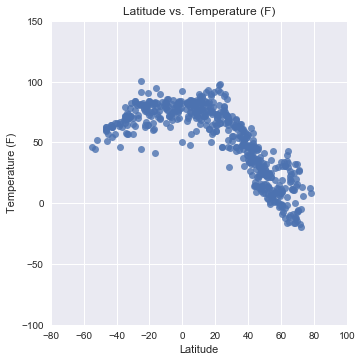

In [133]:
colors=['#FF6103','#FF4500','#FFFF00']
sns.lmplot(x="Latitude", 
           y="Temperature",
           data=weather_df,
           fit_reg=False,palette = colors)
#            scatter_kws={"s":"city"*10,"alpha":0.7,"linewidth":1,"edgecolor":'black'})
sns.set()
plt.title("Latitude vs. Temperature (F)")
plt.ylim(-100,150)
plt.xlim(-80,100)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Fig1.png")

# Latitude vs. Humidity

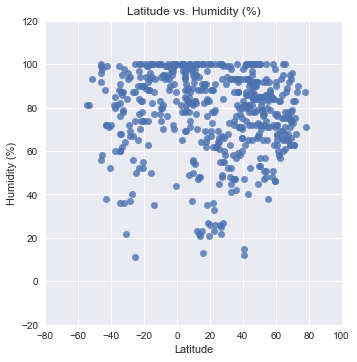

In [134]:
colors=['#FF6103','#FF4500','#FFFF00']
sns.lmplot(x="Latitude", 
           y="Humidity",
           data=weather_df,
           fit_reg=False,palette = colors)
#            scatter_kws={"s":"city"*10,"alpha":0.7,"linewidth":1,"edgecolor":'black'})
sns.set()
plt.title("Latitude vs. Humidity (%)")
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Fig2.png")

# Latitude vs. Cloudiness (%)

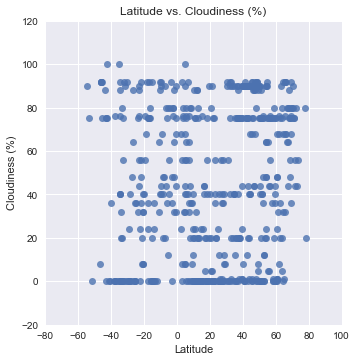

In [135]:
colors=['#FF6103','#FF4500','#FFFF00']
sns.lmplot(x="Latitude", 
           y="Cloudiness",
           data=weather_df,
           fit_reg=False,palette = colors)
#            scatter_kws={"s":"city"*10,"alpha":0.7,"linewidth":1,"edgecolor":'black'})
sns.set()
plt.title("Latitude vs. Cloudiness (%)")
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Fig3.png")

# Latitude vs. Wind Speed (mph)

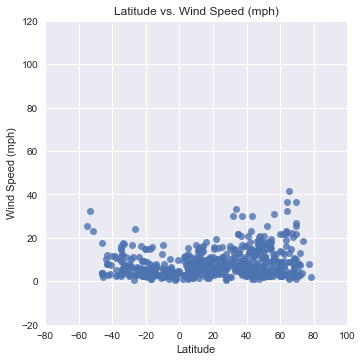

In [137]:
colors=['#FF6103','#FF4500','#FFFF00']
sns.lmplot(x="Latitude", 
           y="Windspeed",
           data=weather_df,
           fit_reg=False,palette = colors)
#            scatter_kws={"s":"city"*10,"alpha":0.7,"linewidth":1,"edgecolor":'black'})
sns.set()
plt.title("Latitude vs. Wind Speed (mph)")
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Fig4.png")